In [1]:
# set cell display width
from IPython.display import display, HTML
display(HTML('<style>.container { width: 930px !important; }</style>'))

In [2]:
# import ML tools
import pandas as pd
import numpy as np

In [3]:
# import plotting tools
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
# set grid size and style
figsize(12, 4)
sns.set_style('whitegrid')

Use "mp.colors(<index>)" as color attribute for Seaborn plots.
This is your color palette...


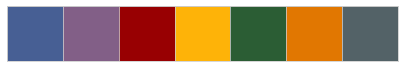

In [4]:
# import custom palette
import my_palette as mp

In [5]:
# set option for palette argument
my_palette = ['xkcd:' + c for c in mp.my_colors]

In [6]:
# read in dataset
df = pd.read_json('../data_wrangling/data/capstone2_optimized_target_ds.json')

In [7]:
# observe dataset dimensionality
df.shape

(11610, 28)

In [8]:
# change gender labels
df['gender'].replace([0, 1], ['male', 'female'], inplace=True)

In [9]:
# convert log target to dollars
df['revenue'] = np.exp(df['revenue'])

In [10]:
# observe a bit of the data
df.iloc[:3, :11]

,revenue,budget,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count
2,1.747277e+07,8.778750e+06,45.773425,male,1.400000,13.497800,1997.000000,86.200000,1,6.620000,556.600000
3,1.142995e+08,8.345003e+07,56.479322,male,0.783784,22.042243,1998.540541,118.027027,1,6.562162,1868.351351
4,1.366157e+07,2.402895e+07,38.717047,female,4.000000,8.555667,1995.111111,102.000000,1,6.044444,467.000000


I will categorize the actors with respect to their earning history.<br>
Top actors will be the upper 10% of the profitability figures.<br>
Elite actors will be the top 1% of that category.

In [11]:
# extract top profitable actors
top_df = df[df['revenue'] >= df['revenue'].quantile(0.9)]

In [12]:
# extract elite profitable actors
elite_df = df[df['revenue'] >= df['revenue'].quantile(0.99)]

In [13]:
# recall features
df.columns

Index(['revenue', 'budget', 'age', 'gender', 'order', 'popularity',
       'release_date', 'runtime', 'usa', 'vote_average', 'vote_count',
       'action', 'adventure', 'animation', 'comedy', 'crime', 'drama',
       'family', 'fantasy', 'history', 'horror', 'music', 'mystery', 'romance',
       'science_fiction', 'thriller', 'war', 'western'],
      dtype='object')

In [14]:
# create list of non-genre feature names
non_genre_lst = ['revenue', 'budget', 'age', 'gender', 'order', 'popularity',
                 'release_date', 'runtime', 'usa', 'vote_average', 'vote_count']

In [15]:
# create list of genre feature names
genre_lst = np.setdiff1d(df.columns, non_genre_lst)

In [16]:
# observe non-genre statistics for all actors
df[non_genre_lst].describe()

,revenue,budget,age,order,popularity,release_date,runtime,usa,vote_average,vote_count
count,1.161000e+04,1.161000e+04,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000
mean,8.240922e+07,3.835586e+07,37.859082,4.414393,12.973080,1996.300264,107.677696,0.445220,6.390071,1222.960747
std,1.214210e+08,3.459472e+07,13.966822,2.113538,7.686444,20.096838,17.159618,0.497011,0.844647,1605.199856
min,1.238841e+00,1.600217e+00,1.182776,0.000000,0.600000,1913.000000,70.000000,0.000000,1.000000,1.000000
25%,1.420554e+07,1.336703e+07,27.902010,3.000000,8.980750,1988.000000,96.500000,0.000000,5.950000,212.000000
50%,4.346080e+07,3.072798e+07,36.151324,4.500000,12.719000,2002.666667,105.500000,0.000000,6.400000,701.333333
75%,9.650258e+07,5.368289e+07,46.661954,6.000000,15.911600,2010.333333,115.333333,1.000000,6.850000,1636.250000
max,9.996018e+08,3.139207e+08,98.961649,8.000000,205.280000,2020.000000,248.000000,1.000000,10.000000,22613.000000


In [17]:
# observe non-genre statistics for top profitable actors
top_df[non_genre_lst].describe()

,revenue,budget,age,order,popularity,release_date,runtime,usa,vote_average,vote_count
count,1.163000e+03,1.163000e+03,1163.000000,1163.000000,1163.000000,1163.000000,1163.000000,1163.000000,1163.000000,1163.000000
mean,3.740264e+08,7.752160e+07,38.100547,4.938076,19.501838,1991.896807,116.399653,0.398108,6.802403,3170.591284
std,1.814584e+08,5.639190e+07,15.417332,2.207452,11.151969,22.010014,23.003800,0.489719,0.717482,3064.221995
min,1.974387e+08,1.792723e+04,2.373765,0.000000,0.620000,1915.000000,71.000000,0.000000,4.300000,2.000000
25%,2.374052e+08,3.581344e+07,27.878738,3.000000,14.211000,1976.000000,101.000000,0.000000,6.300000,1022.000000
50%,3.126097e+08,6.352271e+07,36.801121,5.000000,17.662000,1997.500000,113.000000,0.000000,6.800000,2354.000000
75%,4.454374e+08,1.076847e+08,47.326776,7.000000,23.061000,2010.000000,128.000000,1.000000,7.300000,4145.000000
max,9.996018e+08,3.139207e+08,98.961649,8.000000,180.871000,2020.000000,248.000000,1.000000,8.600000,22613.000000


In [18]:
# observe non-genre statistics for elite profitable actors
elite_df[non_genre_lst].describe()

,revenue,budget,age,order,popularity,release_date,runtime,usa,vote_average,vote_count
count,1.170000e+02,1.170000e+02,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,7.999432e+08,1.017962e+08,38.104922,4.870370,26.008895,1990.665242,116.576923,0.299145,7.168661,5914.581197
std,9.746228e+07,7.268779e+07,17.373507,2.368486,9.278148,18.975906,21.344124,0.459853,0.574586,4976.297541
min,6.485432e+08,1.171121e+07,7.126772,0.000000,7.942000,1953.000000,76.000000,0.000000,5.900000,183.000000
25%,7.219301e+08,4.521723e+07,26.798634,3.000000,18.971000,1973.000000,105.000000,0.000000,6.700000,1878.000000
50%,7.846640e+08,7.363641e+07,35.510654,5.000000,24.608000,1992.000000,117.000000,0.000000,7.200000,4642.000000
75%,8.803260e+08,1.601939e+08,45.857204,7.000000,32.057000,2006.000000,129.000000,1.000000,7.600000,7792.000000
max,9.996018e+08,3.139207e+08,85.795054,8.000000,48.382000,2018.500000,200.000000,1.000000,8.300000,22613.000000


In [19]:
# observe genre statistics for all actors
df[genre_lst].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
action,11610.0,0.942463,1.890616,0.0,0.0,0.0,1.0,32.0
adventure,11610.0,0.626357,1.310754,0.0,0.0,0.0,1.0,17.0
animation,11610.0,0.167959,0.619304,0.0,0.0,0.0,0.0,11.0
comedy,11610.0,1.280276,2.472590,0.0,0.0,1.0,1.0,34.0
crime,11610.0,0.583118,1.353660,0.0,0.0,0.0,1.0,26.0
drama,11610.0,1.646253,2.797470,0.0,0.0,1.0,2.0,33.0
family,11610.0,0.364169,0.940302,0.0,0.0,0.0,0.0,15.0
fantasy,11610.0,0.340396,0.825281,0.0,0.0,0.0,0.0,13.0
history,11610.0,0.156675,0.519249,0.0,0.0,0.0,0.0,9.0
horror,11610.0,0.399139,0.774429,0.0,0.0,0.0,1.0,11.0


In [20]:
# observe genre statistics for top profitable actors
top_df[genre_lst].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
action,1163.0,0.604471,1.182946,0.0,0.0,0.0,1.0,19.0
adventure,1163.0,0.591574,1.045850,0.0,0.0,0.0,1.0,14.0
animation,1163.0,0.196045,0.607825,0.0,0.0,0.0,0.0,7.0
comedy,1163.0,0.585555,1.110208,0.0,0.0,0.0,1.0,13.0
crime,1163.0,0.185727,0.518075,0.0,0.0,0.0,0.0,5.0
drama,1163.0,0.578676,1.203677,0.0,0.0,0.0,1.0,23.0
family,1163.0,0.346518,0.796590,0.0,0.0,0.0,0.0,8.0
fantasy,1163.0,0.249355,0.628967,0.0,0.0,0.0,0.0,5.0
history,1163.0,0.072227,0.304771,0.0,0.0,0.0,0.0,4.0
horror,1163.0,0.143594,0.383637,0.0,0.0,0.0,0.0,3.0


In [21]:
# observe genre statistics for elite actors
elite_df[genre_lst].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
action,117.0,0.504274,0.749988,0.0,0.0,0.0,1.0,6.0
adventure,117.0,0.589744,0.756054,0.0,0.0,1.0,1.0,6.0
animation,117.0,0.247863,0.506951,0.0,0.0,0.0,0.0,3.0
comedy,117.0,0.350427,0.530391,0.0,0.0,0.0,1.0,2.0
crime,117.0,0.051282,0.221521,0.0,0.0,0.0,0.0,1.0
drama,117.0,0.222222,0.437688,0.0,0.0,0.0,0.0,2.0
family,117.0,0.333333,0.557086,0.0,0.0,0.0,1.0,3.0
fantasy,117.0,0.273504,0.484660,0.0,0.0,0.0,1.0,2.0
history,117.0,0.008547,0.092450,0.0,0.0,0.0,0.0,1.0
horror,117.0,0.017094,0.130179,0.0,0.0,0.0,0.0,1.0


There are some trend in the data.<br>
I will explore a few of them with visualizations.

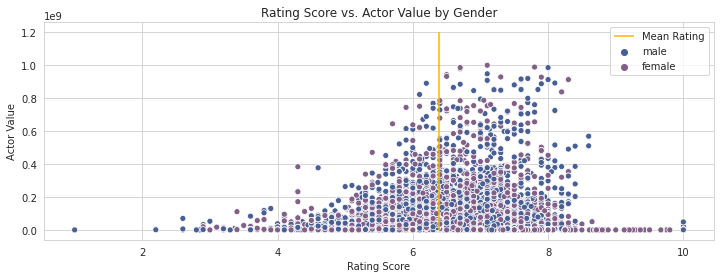

In [22]:
# plot rating score vs. actor value by gender

plt.vlines(x=np.mean(df['vote_average']), ymin=0, ymax=1.2e9, 
           colors=mp.colors(3), label='Mean Rating')

sns.scatterplot(x='vote_average', y='revenue', hue=df.gender.tolist(), data=df)

plt.xlabel('Rating Score')
plt.ylabel('Actor Value')

plt.legend()
plt.title('Rating Score vs. Actor Value by Gender');

The actors with the highest average movie revenue act in movies that have higher ratings.<br>
The actors with the largest average movie revenues are evenly distributed between male and female actors.

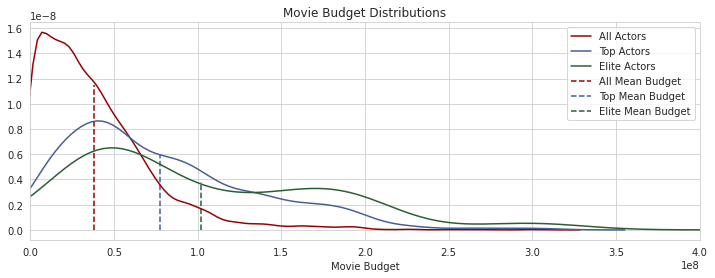

In [23]:
# plot movie budget distributions for actor classes

plt.xlim(0, 4e8)

sns.kdeplot(df['budget'],color=mp.colors(2), label='All Actors')
plt.vlines(x=np.mean(df['budget']), ymin=0, ymax=1.15e-8, color=mp.colors(2), 
           label='All Mean Budget', linestyles='dashed')

sns.kdeplot(top_df['budget'], color=mp.colors(0),label='Top Actors')
plt.vlines(x=np.mean(top_df['budget']), ymin=0, ymax=6e-9, color=mp.colors(0), 
          label='Top Mean Budget', linestyles='dashed')

sns.kdeplot(elite_df['budget'], color=mp.colors(4),label='Elite Actors')
plt.vlines(x=np.mean(elite_df['budget']), ymin=0, ymax=3.8e-9, color=mp.colors(4), 
          label='Elite Mean Budget', linestyles='dashed')

plt.xlabel('Movie Budget')
plt.legend()
plt.title('Movie Budget Distributions');

The average movie budgets do not increase as we go from all actors to the most elite ones.<br>
Movies with elite actors use smaller budgets to get larger revenues than movies with top actors.

Average movie budgets for the elite actors is bimodal.<br>
The second mode of the elite actor distribution is shifted to higher budgets.

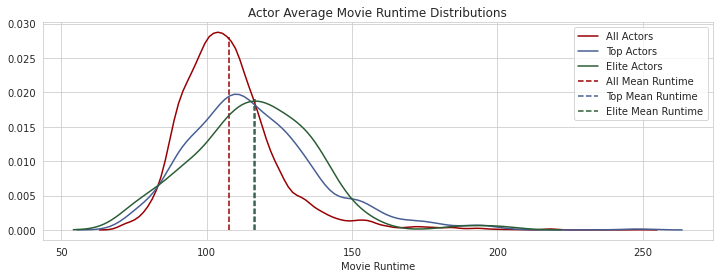

In [24]:
# plot runtime distributions for actor classes

sns.kdeplot(df['runtime'],color=mp.colors(2), label='All Actors')
plt.vlines(x=np.mean(df['runtime']), ymin=0, ymax=0.028, color=mp.colors(2), 
           label='All Mean Runtime', linestyles='dashed')

sns.kdeplot(top_df['runtime'], color=mp.colors(0),label='Top Actors')
plt.vlines(x=np.mean(top_df['runtime']), ymin=0, ymax=0.018, color=mp.colors(0), 
          label='Top Mean Runtime', linestyles='dashed')

sns.kdeplot(elite_df['runtime'], color=mp.colors(4),label='Elite Actors')
plt.vlines(x=np.mean(elite_df['runtime']), ymin=0, ymax=0.019, color=mp.colors(4), 
          label='Elite Mean Runtime', linestyles='dashed')

plt.xlabel('Movie Runtime')
plt.legend()
plt.title('Actor Average Movie Runtime Distributions');

The average runtime for all actors is constrained between an hour and forty-five minutes and two hours.<br>
The elite actor distribution has an small additional mode for movies with runtimes greater than three hours.<br>
There may be a positive correlation between runtime and revenue.

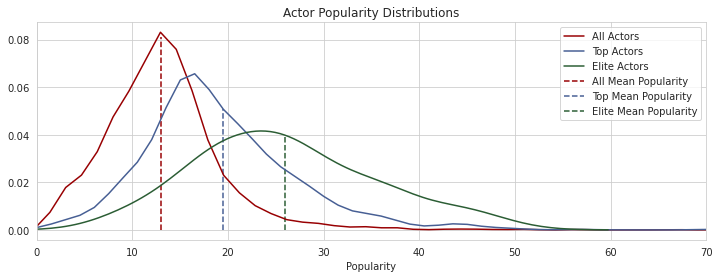

In [25]:
# plot actor popularity distributions for actor classes

plt.xlim(0, 70)

sns.kdeplot(df['popularity'],color=mp.colors(2), label='All Actors')
plt.vlines(x=np.mean(df['popularity']), ymin=0, ymax=0.081, color=mp.colors(2), 
           label='All Mean Popularity', linestyles='dashed')

sns.kdeplot(top_df['popularity'], color=mp.colors(0),label='Top Actors')
plt.vlines(x=np.mean(top_df['popularity']), ymin=0, ymax=0.051, color=mp.colors(0), 
          label='Top Mean Popularity', linestyles='dashed')

sns.kdeplot(elite_df['popularity'], color=mp.colors(4),label='Elite Actors')
plt.vlines(x=np.mean(elite_df['popularity']), ymin=0, ymax=0.04, color=mp.colors(4), 
          label='Elite Mean Popularity', linestyles='dashed')

plt.xlabel('Popularity')
plt.legend()
plt.title('Actor Popularity Distributions');

Popularity is a TMDb proprietary ranking determined by website activity pertaining to the actors.<br>
The average actor popularity increases as we go from all actors to the most elite ones.

In [26]:
# read in full actor reference dataset
all_actor_df = pd.read_json('./data/capstone2_ref.json')

In [27]:
def aggregate_data(data, feature='person_id'):
    """Return aggregated DataFrame grouped by chosen feature"""
    # aggregate while making counts of genres and taking the average of all other values
    agg_actor_df = data.groupby(feature).agg(
        {'revenue': np.mean, 'budget': np.mean, 'age': np.mean, 'gender': 'first', 
         'order':np.mean, 'popularity':np.mean, 'release_date': np.mean, 
         'runtime': np.mean, 'usa': 'first', 'vote_average': np.mean, 
         'vote_count': np.mean, 'action': np.sum, 'adventure': np.sum, 
         'animation': np.sum, 'comedy': np.sum, 'crime': np.sum, 'drama': np.sum, 
         'family': np.sum, 'fantasy': np.sum, 'history': np.sum, 'horror': np.sum, 
         'music': np.sum, 'mystery': np.sum, 'romance': np.sum, 'science_fiction': np.sum, 
         'thriller': np.sum, 'war': np.sum, 'western': np.sum})
    
    return agg_actor_df

In [28]:
def remove_outliers(data, before_agg=False):
    """Return DataFrame after outliers have been identified and removed"""
    # create copy of dataset to identify outlier revenues
    copy_df = data.copy()
    # aggregate over movies, if data has not been aggregated over actors
    if before_agg:
        copy_df = aggregate_data(copy_df, feature='movie_id')
    # determine outlier cut off values
    mean = np.mean(copy_df['revenue'])
    std = np.std(copy_df['revenue'])
    cut_off = std * 3
    # define lower and upper bounds for outliers
    lower, upper = mean - cut_off, mean + cut_off
    # remove outlier revenues from dataset
    new_df = data[(data['revenue'] < upper) & (data['revenue'] > lower)]
    
    return new_df

In [29]:
# get DataFrame with no outliers movies revenue
actor_df = remove_outliers(all_actor_df, before_agg=True)
actor_df.head(8)

,person_id,name,movie_id,title,revenue,budget,profit,age,gender,order,...,fantasy,history,horror,music,mystery,romance,science_fiction,thriller,war,western
0,2,Mark Hamill,16121,The Big Red One,2.273880e+07,1.419948e+07,8.539315e+06,28.674100,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2,Mark Hamill,14919,Batman: Mask of the Phantasm,9.944670e+06,1.062202e+07,-6.773465e+05,42.251381,0,1,...,0,0,0,0,1,0,0,1,0,0
4,2,Mark Hamill,16220,Wizards,3.930685e+07,5.240914e+06,3.406594e+07,25.377660,0,4,...,1,0,0,0,0,0,1,0,0,0
9,2,Mark Hamill,533642,Child's Play,4.524793e+07,1.007699e+07,3.517094e+07,67.733081,0,0,...,0,0,1,0,0,0,0,0,0,0
10,2,Mark Hamill,382322,Batman: The Killing Joke,4.049338e+06,3.754353e+06,2.949849e+05,64.830900,0,1,...,0,0,0,0,0,0,0,0,0,0
11,3,Harrison Ford,2655,What Lies Beneath,4.353007e+08,1.493721e+08,2.859286e+08,58.024463,0,0,...,0,0,1,0,1,0,0,1,0,0
12,3,Harrison Ford,27569,Extraordinary Measures,1.802779e+07,3.692683e+07,-1.889904e+07,67.527738,0,0,...,0,0,0,0,0,0,0,0,0,0
14,3,Harrison Ford,10675,Frantic,3.924672e+07,4.450259e+07,-5.255867e+06,45.597103,0,0,...,0,0,0,0,0,0,0,1,0,0


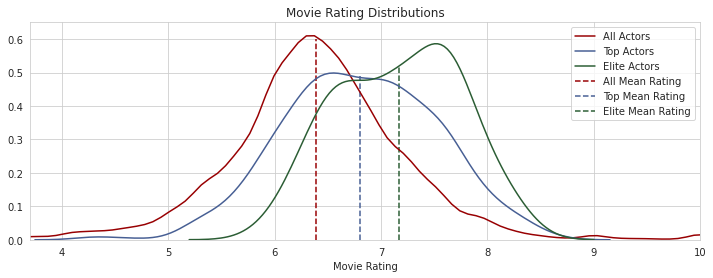

In [30]:
# plot movie rating distributions for actor classes

plt.xlim(3.7, 10)
plt.ylim(0, 0.65)

sns.kdeplot(df['vote_average'],color=mp.colors(2), label='All Actors')
plt.vlines(x=np.mean(df['vote_average']), ymin=0, ymax=0.6, color=mp.colors(2), 
           label='All Mean Rating', linestyles='dashed')

sns.kdeplot(top_df['vote_average'], color=mp.colors(0),label='Top Actors')
plt.vlines(x=np.mean(top_df['vote_average']), ymin=0, ymax=0.49, color=mp.colors(0), 
          label='Top Mean Rating', linestyles='dashed')

sns.kdeplot(elite_df['vote_average'], color=mp.colors(4),label='Elite Actors')
plt.vlines(x=np.mean(elite_df['vote_average']), ymin=0, ymax=0.52, color=mp.colors(4), 
          label='Elite Mean Rating', linestyles='dashed')

plt.xlabel('Movie Rating')
plt.legend()
plt.title('Movie Rating Distributions');

The average movie rating increases as we go from all actors to the most elite ones.<br>
The distribution for elite actors has a strong second mode in the highest ratings.<br>
This points to reviewers agreeing more about which actors are elite.<br>
There is a uniform shift to lower ratings when it comes to those for the random actor.

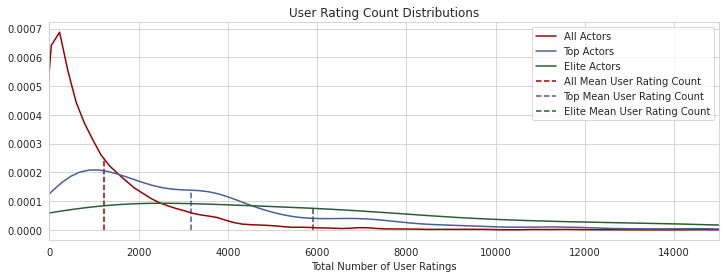

In [31]:
# plot total number of user ratings distributions for actor classes

plt.xlim(0, 15e3)

sns.kdeplot(df['vote_count'],color=mp.colors(2), label='All Actors')
plt.vlines(x=np.mean(df['vote_count']), ymin=0, ymax=2.5e-4, color=mp.colors(2), 
           label='All Mean User Rating Count', linestyles='dashed')

sns.kdeplot(top_df['vote_count'], color=mp.colors(0),label='Top Actors')
plt.vlines(x=np.mean(top_df['vote_count']), ymin=0, ymax=1.4e-4, color=mp.colors(0), 
          label='Top Mean User Rating Count', linestyles='dashed')

sns.kdeplot(elite_df['vote_count'], color=mp.colors(4),label='Elite Actors')
plt.vlines(x=np.mean(elite_df['vote_count']), ymin=0, ymax=8.3e-5, color=mp.colors(4), 
          label='Elite Mean User Rating Count', linestyles='dashed')

plt.xlabel('Total Number of User Ratings')
plt.legend()
plt.title('User Rating Count Distributions');

The average number of total user ratings increases as we go from all actors to the most elite ones.<br>
This supports the idea that name recognition will drive revenue numbers.<br>
This is commonly referred to as star power.

There are clear trends that will be helpful for making predictions about which actors will have the highest revenue totals.

Now, I will rank the actors by their tier.

In [32]:
# create top actor binary feature
df['is_top'] = df['revenue'].transform(
    lambda x: int(x >= np.min(top_df['revenue']) ))

In [33]:
# create elite actor binary feature
df['is_elite'] = df['revenue'].transform(
    lambda x: int(x >= np.min(elite_df['revenue']) ))

In [34]:
# create actor rank feature
df['rank'] = df['is_top'] + df['is_elite']

In [35]:
# observe DataFrame without looking at genres
df.drop(genre_lst, axis=1).head(3)

,revenue,budget,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count,is_top,is_elite,rank
2,1.747277e+07,8.778750e+06,45.773425,male,1.400000,13.497800,1997.000000,86.200000,1,6.620000,556.600000,0,0,0
3,1.142995e+08,8.345003e+07,56.479322,male,0.783784,22.042243,1998.540541,118.027027,1,6.562162,1868.351351,0,0,0
4,1.366157e+07,2.402895e+07,38.717047,female,4.000000,8.555667,1995.111111,102.000000,1,6.044444,467.000000,0,0,0


The rank feature has values of 2 for the elite 1%, 1 for top 10%, and 0 for all other actors.

In [36]:
# combine genres into feature and sum over each tier of actors
genre_count_df = pd.melt(df, 
                   id_vars=['gender', 'is_top', 'is_elite'], 
                   value_vars = genre_lst, 
                   var_name = 'genre', 
                   value_name = 'all_actors')

In [37]:
# drop observations without genre
genre_count_df = genre_count_df.loc[genre_count_df['all_actors'] > 0]

In [38]:
# group tiered actors by genres of their films
genre_count_df = genre_count_df.groupby('genre', as_index=False).agg(sum)

In [39]:
# observe DataFrame
genre_count_df.head(3)

,genre,is_top,is_elite,all_actors
0,action,463,51,10942
1,adventure,473,60,7272
2,animation,164,26,1950


Now, I have the actors grouped by their movie genres and tiers.

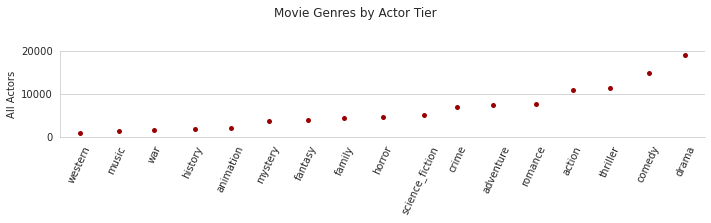

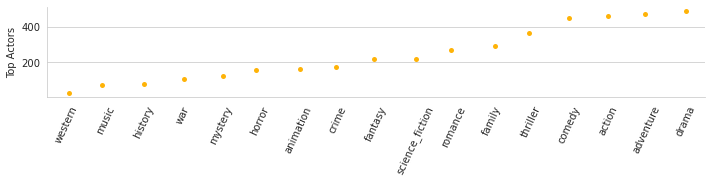

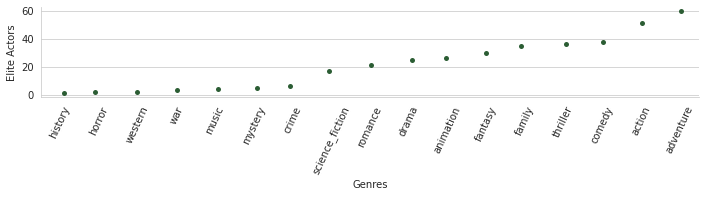

In [40]:
# plot genres by actor ranks

ax = sns.catplot(data=genre_count_df.sort_values('all_actors'), 
                 x='genre', y='all_actors', height=2, aspect=5, 
                 color=mp.colors(2), label='All Actors').set_xticklabels(rotation=65)
plt.xlabel('')
plt.ylabel('All Actors')

sns.catplot(data=genre_count_df.sort_values('is_top'), x='genre', y='is_top', 
            height=2, aspect=5, color=mp.colors(3)).set_xticklabels(rotation=65)
plt.xlabel('')
plt.ylabel('Top Actors')

sns.catplot(data=genre_count_df.sort_values('is_elite'), x='genre', y='is_elite', 
            height=2, aspect=5, color=mp.colors(4)).set_xticklabels(rotation=65)
plt.xlabel('Genres')
plt.ylabel('Elite Actors')

ax.fig.suptitle('Movie Genres by Actor Tier', y=1.2);

The importances of crime, drama, horror, romance, and science fiction movies decline once we get to the elite actors.

Six genres are elevated by the elite tier actors: action, adventure, animation, family, fantasy, and music.

History, war, and western movies are consistantly at the bottom of earning options for any tiered actor.

In [41]:
def sort_elite_genre(genre, least_num_movies=1, gender=''):
    """Return DataFrame of elite actors in multiple mopvies of chosen genre"""
    # remove gender not selected
    if gender == 'female':
        gender_df = actor_df[actor_df['gender'] == 1]
    elif gender == 'male':
        gender_df = actor_df[actor_df['gender'] == 0]
    else:
        gender_df = actor_df.copy()
    # extract elite actors in more than 1 movie of the chosen genre
    multiple_movies_df = gender_df[gender_df['person_id'].isin(
        elite_df[elite_df[genre] >= least_num_movies].index)]
    # sort by revenue and drop movies not in genre category
    elite_genre_df = multiple_movies_df[multiple_movies_df[genre] > 0].drop(
        genre_lst, axis=1).sort_values(
        'revenue', ascending=False)
    # get count of elite actors in multiple movies in genre
    num_multiple_elite = len(
        multiple_movies_df[multiple_movies_df[genre] > 0]['name'].unique())
    # get DataFrame of elite actors in at least one movie in genre
    any_movies_df = gender_df[gender_df['person_id'].isin(
        elite_df[elite_df[genre] > 0].index)]
    # get count of elite actors in at least one movie in genre
    num_elite = len(
        any_movies_df[any_movies_df[genre] > 0]['name'].unique())
    if gender != '':
        gender = gender + ' '
    if least_num_movies >= 2:
        print(
            num_multiple_elite, 'out of', 
            num_elite, 'elite ' + gender + 'actors were in at least', 
            least_num_movies, genre, 'films.')
    else:
        print(
            num_elite, 'elite ' + gender + 'actors were at least one', genre, 'film.')        
    
    return elite_genre_df    

In [42]:
# show elite actors appearing in movies by genre
sort_elite_genre('adventure', least_num_movies=3)

1 out of 60 elite actors were in at least 3 adventure films.


,person_id,name,movie_id,title,revenue,budget,profit,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count
15177,9874,Bernard Lee,253,Live and Let Die,9.426024e+08,4.078567e+07,9.018167e+08,65.485260,0,8,23.992,1973,121,0,6.5,1093
15172,9874,Bernard Lee,667,You Only Live Twice,8.649161e+08,7.363641e+07,7.912797e+08,59.423534,0,7,32.113,1967,117,0,6.6,1146
15174,9874,Bernard Lee,691,The Spy Who Loved Me,7.846640e+08,5.923951e+07,7.254245e+08,69.490818,0,7,18.321,1977,125,0,6.7,1035
15173,9874,Bernard Lee,698,Moonraker,7.508115e+08,1.213819e+08,6.294297e+08,71.459373,0,5,22.474,1979,126,0,6.1,1082
15179,9874,Bernard Lee,657,From Russia with Love,6.611998e+08,1.676071e+07,6.444391e+08,55.752000,0,3,27.729,1963,115,0,7.1,1629
15178,9874,Bernard Lee,646,Dr. No,5.060413e+08,8.066094e+06,4.979752e+08,54.741713,0,3,32.422,1962,110,0,7.0,1992


In [43]:
# show elite actors appearing in movies by genre
sort_elite_genre('adventure', least_num_movies=2)

5 out of 60 elite actors were in at least 2 adventure films.


,person_id,name,movie_id,title,revenue,budget,profit,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count
15177,9874,Bernard Lee,253,Live and Let Die,9.426024e+08,4.078567e+07,9.018167e+08,65.485260,0,8,23.992,1973,121,0,6.5,1093
39119,998225,Alison Sudol,259316,Fantastic Beasts and Where to Find Them,8.655513e+08,1.925010e+08,6.730502e+08,31.899355,1,4,39.470,2016,133,1,7.4,13877
15172,9874,Bernard Lee,667,You Only Live Twice,8.649161e+08,7.363641e+07,7.912797e+08,59.423534,0,7,32.113,1967,117,0,6.6,1146
38716,556356,Vanessa Kirby,353081,Mission: Impossible - Fallout,8.101929e+08,1.823150e+08,6.278779e+08,30.234707,1,7,32.950,2018,148,0,7.3,4946
15174,9874,Bernard Lee,691,The Spy Who Loved Me,7.846640e+08,5.923951e+07,7.254245e+08,69.490818,0,7,18.321,1977,125,0,6.7,1035
15418,10173,George Baker,691,The Spy Who Loved Me,7.846640e+08,5.923951e+07,7.254245e+08,46.267891,0,8,18.321,1977,125,0,6.7,1035
15732,10462,Geoffrey Keen,691,The Spy Who Loved Me,7.846640e+08,5.923951e+07,7.254245e+08,60.877362,0,6,18.321,1977,125,0,6.7,1035
38717,556356,Vanessa Kirby,384018,Fast & Furious Presents: Hobbs & Shaw,7.647119e+08,2.012138e+08,5.634981e+08,31.286063,1,3,53.873,2019,137,0,6.8,3426
15173,9874,Bernard Lee,698,Moonraker,7.508115e+08,1.213819e+08,6.294297e+08,71.459373,0,5,22.474,1979,126,0,6.1,1082
15733,10462,Geoffrey Keen,698,Moonraker,7.508115e+08,1.213819e+08,6.294297e+08,62.845917,0,6,22.474,1979,126,0,6.1,1082


The Bond series of films can be credited with most of the adventure movies with elite actors.<br>
Vanessa Kirby was in two different big adventure series, Mission Impossible and Fast & Furious.

In [44]:
# show elite actors appearing in movies by genre
sort_elite_genre('action', least_num_movies=2)

4 out of 51 elite actors were in at least 2 action films.


,person_id,name,movie_id,title,revenue,budget,profit,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count
15177,9874,Bernard Lee,253,Live and Let Die,9.426024e+08,4.078567e+07,9.018167e+08,65.485260,0,8,23.992,1973,121,0,6.5,1093
15172,9874,Bernard Lee,667,You Only Live Twice,8.649161e+08,7.363641e+07,7.912797e+08,59.423534,0,7,32.113,1967,117,0,6.6,1146
38716,556356,Vanessa Kirby,353081,Mission: Impossible - Fallout,8.101929e+08,1.823150e+08,6.278779e+08,30.234707,1,7,32.950,2018,148,0,7.3,4946
15174,9874,Bernard Lee,691,The Spy Who Loved Me,7.846640e+08,5.923951e+07,7.254245e+08,69.490818,0,7,18.321,1977,125,0,6.7,1035
15418,10173,George Baker,691,The Spy Who Loved Me,7.846640e+08,5.923951e+07,7.254245e+08,46.267891,0,8,18.321,1977,125,0,6.7,1035
15732,10462,Geoffrey Keen,691,The Spy Who Loved Me,7.846640e+08,5.923951e+07,7.254245e+08,60.877362,0,6,18.321,1977,125,0,6.7,1035
38717,556356,Vanessa Kirby,384018,Fast & Furious Presents: Hobbs & Shaw,7.647119e+08,2.012138e+08,5.634981e+08,31.286063,1,3,53.873,2019,137,0,6.8,3426
15173,9874,Bernard Lee,698,Moonraker,7.508115e+08,1.213819e+08,6.294297e+08,71.459373,0,5,22.474,1979,126,0,6.1,1082
15733,10462,Geoffrey Keen,698,Moonraker,7.508115e+08,1.213819e+08,6.294297e+08,62.845917,0,6,22.474,1979,126,0,6.1,1082
15179,9874,Bernard Lee,657,From Russia with Love,6.611998e+08,1.676071e+07,6.444391e+08,55.752000,0,3,27.729,1963,115,0,7.1,1629


Not surprisingly, action and adventure go hand in hand.<br>
The Fantastic Beasts series must be purely an adventure movie.

In [45]:
# show elite actors appearing in movies by genre
sort_elite_genre('comedy', least_num_movies=2)

3 out of 38 elite actors were in at least 2 comedy films.


,person_id,name,movie_id,title,revenue,budget,profit,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count
3630,1219,Amy Yasbeck,114,Pretty Woman,9.285722e+08,2.807778e+07,9.004944e+08,27.526917,1,6,18.913,1990,119,1,7.3,4642
77,10,Bob Peterson,14160,Up,8.872330e+08,2.112175e+08,6.760155e+08,48.356914,0,3,29.984,2009,96,1,7.9,14198
78,10,Bob Peterson,585,"Monsters, Inc.",8.188913e+08,1.673237e+08,6.515676e+08,40.786601,0,6,44.419,2001,92,1,7.8,12525
37531,151246,Nicole Scherzinger,277834,Moana,7.436220e+08,1.604175e+08,5.832044e+08,38.404622,1,5,7.942,2016,107,1,7.6,8073
37530,151246,Nicole Scherzinger,41154,Men in Black 3,7.008710e+08,2.527071e+08,4.481639e+08,33.900765,1,7,19.380,2012,106,1,6.4,7349
3629,1219,Amy Yasbeck,854,The Mask,6.115158e+08,4.000435e+07,5.715115e+08,31.877451,1,7,36.191,1994,101,1,6.9,6492


There are many elite actors contributing to the total performances in each genre.

In [46]:
# combine genres into feature and sum over all actors
gender_rank_df = pd.melt(df, 
                   id_vars=['gender', 'rank'], 
                   value_vars = genre_lst, 
                   var_name = 'genre', 
                   value_name = 'count')

In [47]:
# drop observations without genre
gender_rank_df = gender_rank_df.loc[gender_rank_df['count'] > 0]

In [48]:
# observe DataFrame
gender_rank_df.head()

,gender,rank,genre,count
0,male,0,action,2
1,male,0,action,13
9,female,0,action,2
13,male,0,action,3
14,female,0,action,3


Now, I have the actors grouped by their movie genres, genders, and ranks.

In [49]:
def plot_genres():
    """Plot distribution of genres by actor rank and gender"""
    sns.set(font_scale=6)
    
    g = sns.catplot(x='genre', hue='gender', row='rank', data=gender_rank_df, 
                    kind='count', sharey=False, height=10, aspect=4, 
                    palette=my_palette[:2])
    
    g.set_xticklabels(fontsize=50, rotation=70)

    plt.xlabel('Genre', fontsize=80)

    g.fig.suptitle('Movie Genres by Actor Rank', y=1.03)

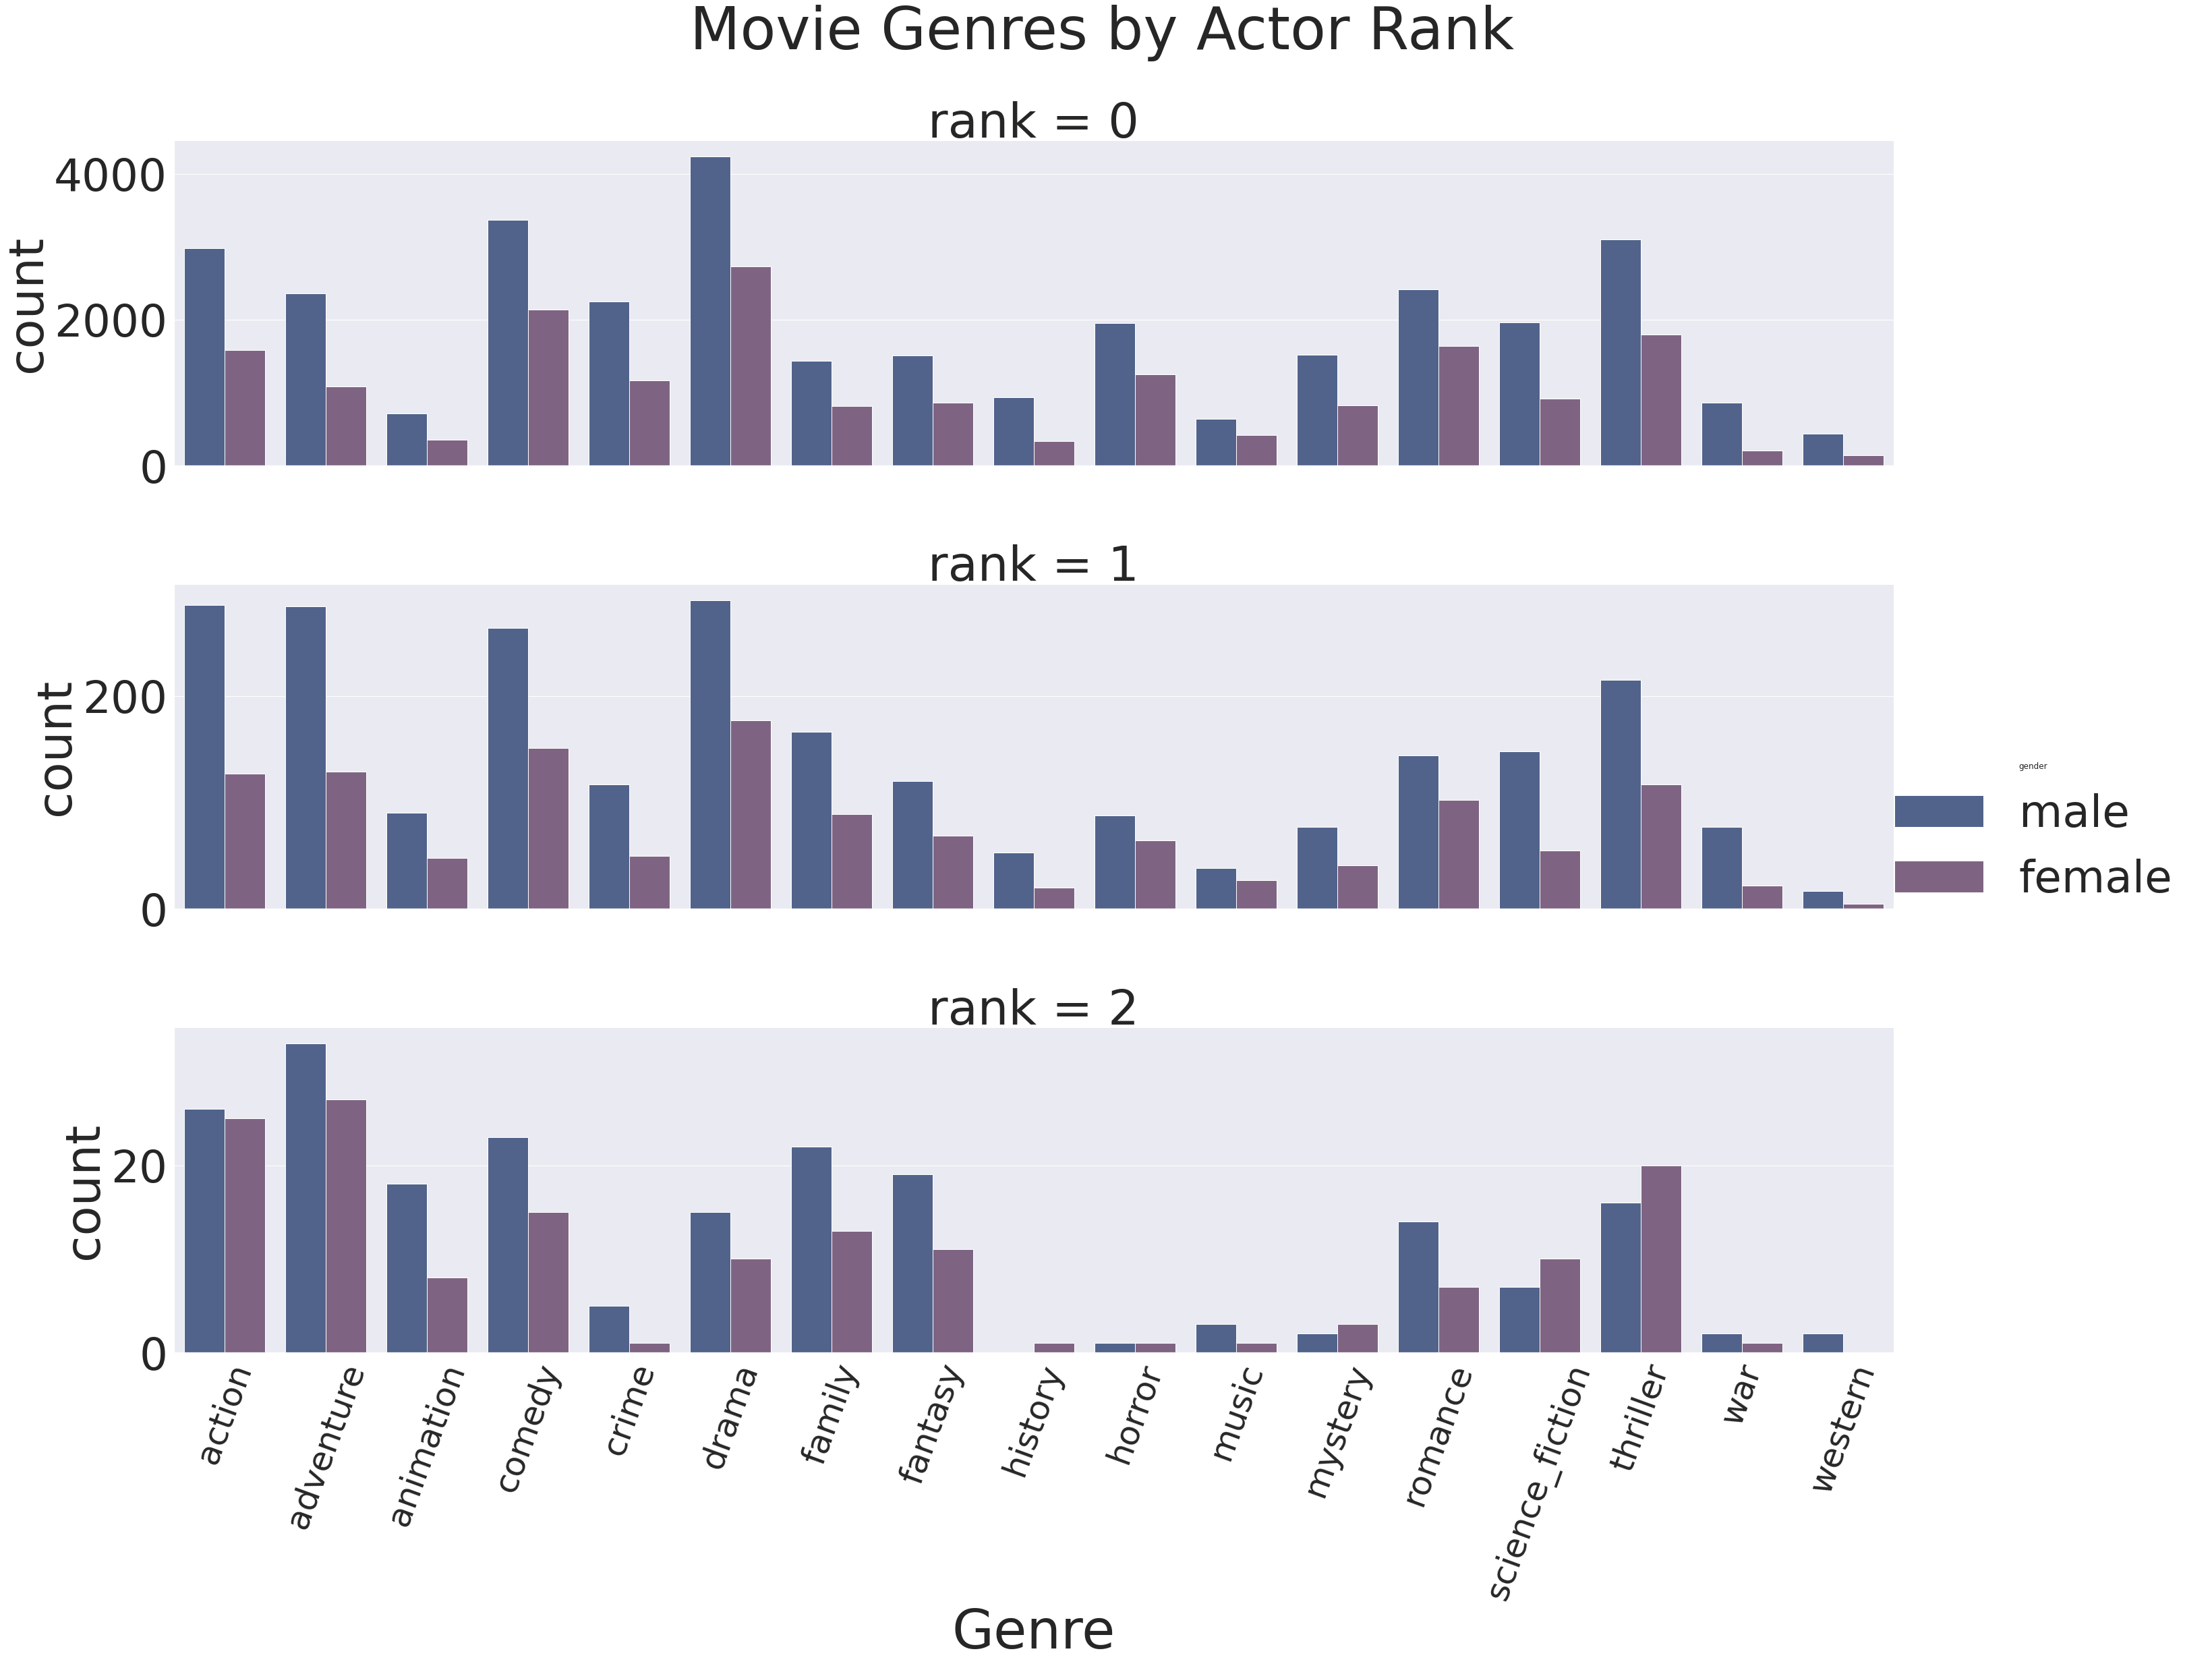

In [50]:
# plot distributions of genres by actor rank and gender
plot_genres()

The genres of adventure, animation, and family are the most dominant ones among the rank 2 actors.<br>
Rank 0 actors tend to have roles in action, comedy, drama, and thriller movies.<br>
These two observations can be seen in the previous plot, as well.

The proportion of female actors by genre is fairly consistant in ranks 0 and 1.<br>
They outnumber the male actors in the genres of drama, romance, thriller, and war.

In [51]:
# show elite actors appearing in movies by genre
sort_elite_genre('science_fiction', gender='female')

10 elite female actors were at least one science_fiction film.


,person_id,name,movie_id,title,revenue,budget,profit,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count
26609,33190,Pernilla August,1894,Star Wars: Episode II - Attack of the Clones,9.322550e+08,1.722681e+08,7.599869e+08,44.250053,1,7,35.960,2002,142,0,6.5,8635
38605,505710,Zendaya,315635,Spider-Man: Homecoming,9.280935e+08,1.845290e+08,7.435644e+08,20.840948,1,6,42.614,2017,133,1,7.4,14058
3234,1066,Claudia Wells,105,Back to the Future,9.125245e+08,4.549337e+07,8.670312e+08,18.995599,1,5,36.687,1985,116,0,8.3,12955
3239,1068,Wendie Jo Sperber,105,Back to the Future,9.125245e+08,4.549337e+07,8.670312e+08,26.798634,1,7,36.687,1985,116,0,8.3,12955
37271,139820,Pom Klementieff,283995,Guardians of the Galaxy Vol. 2,9.117649e+08,2.111163e+08,7.006486e+08,30.962990,1,7,44.477,2017,137,0,7.6,14699
26731,33500,Takayo Fischer,74,War of the Worlds,7.852792e+08,1.751732e+08,6.101061e+08,72.590128,1,8,18.631,2005,116,0,6.4,5274
15739,10476,Corinne Cléry,698,Moonraker,7.508115e+08,1.213819e+08,6.294297e+08,29.260012,1,3,22.474,1979,126,0,6.1,1082
14785,9364,Gloria Foster,603,The Matrix,7.250957e+08,9.855300e+07,6.265427e+08,65.370268,1,5,37.766,1999,136,1,8.1,16845
37530,151246,Nicole Scherzinger,41154,Men in Black 3,7.008710e+08,2.527071e+08,4.481639e+08,33.900765,1,7,19.380,2012,106,1,6.4,7349
40357,1464650,Dafne Keen,263115,Logan,6.558980e+08,1.027785e+08,5.531195e+08,12.150831,1,2,37.737,2017,137,0,7.8,14092


In [52]:
# show elite actors appearing in movies by genre
sort_elite_genre('drama', gender='female')

10 elite female actors were at least one drama film.


,person_id,name,movie_id,title,revenue,budget,profit,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count
8213,3420,Armelia McQueen,251,Ghost,9.996018e+08,4.354701e+07,9.560548e+08,38.514138,1,8,17.725,1990,127,1,7.1,3395
33035,67787,Karen Lynn Gorney,11009,Saturday Night Fever,9.855470e+08,1.454754e+07,9.709995e+08,32.882263,1,1,14.295,1977,118,0,6.7,1017
38605,505710,Zendaya,315635,Spider-Man: Homecoming,9.280935e+08,1.845290e+08,7.435644e+08,20.840948,1,6,42.614,2017,133,1,7.4,14058
40182,1371894,Kaitlyn Dias,150540,Inside Out,9.276071e+08,1.892830e+08,7.383241e+08,16.079728,1,6,43.536,2015,95,0,7.9,14731
33181,69103,Lori Martin,11349,Cape Fear,8.803260e+08,2.991399e+08,5.811861e+08,14.984565,1,3,9.400,1962,105,0,7.5,267
37003,127638,Barrie Chase,11349,Cape Fear,8.803260e+08,2.991399e+08,5.811861e+08,28.476971,1,6,9.400,1962,105,1,7.5,267
14017,8768,Maia Morgenstern,615,The Passion of the Christ,8.482300e+08,4.158673e+07,8.066432e+08,41.821530,1,1,24.530,2004,127,0,7.3,2388
28815,45865,Ellen Hamilton Latzen,10998,Fatal Attraction,7.185600e+08,3.142270e+07,6.871374e+08,7.126772,1,3,13.954,1987,119,0,6.8,750
40357,1464650,Dafne Keen,263115,Logan,6.558980e+08,1.027785e+08,5.531195e+08,12.150831,1,2,37.737,2017,137,0,7.8,14092
14581,9190,Koyuki,616,The Last Samurai,6.488516e+08,1.988778e+08,4.499738e+08,26.059399,1,7,16.769,2003,154,0,7.5,4166


The drama genre holds a little more variety, as there are more actors with credits in those movies.

In [53]:
# show elite actors appearing in movies by genre
sort_elite_genre('adventure', least_num_movies=2, gender='female')

2 out of 27 elite female actors were in at least 2 adventure films.


,person_id,name,movie_id,title,revenue,budget,profit,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count
39119,998225,Alison Sudol,259316,Fantastic Beasts and Where to Find Them,8.655513e+08,1.925010e+08,6.730502e+08,31.899355,1,4,39.470,2016,133,1,7.4,13877
38716,556356,Vanessa Kirby,353081,Mission: Impossible - Fallout,8.101929e+08,1.823150e+08,6.278779e+08,30.234707,1,7,32.950,2018,148,0,7.3,4946
38717,556356,Vanessa Kirby,384018,Fast & Furious Presents: Hobbs & Shaw,7.647119e+08,2.012138e+08,5.634981e+08,31.286063,1,3,53.873,2019,137,0,6.8,3426
39118,998225,Alison Sudol,338952,Fantastic Beasts: The Crimes of Grindelwald,6.691093e+08,2.048223e+08,4.642870e+08,33.892551,1,2,34.908,2018,134,1,6.9,6644


Six of these rank 2 actors were in Bond films.<br>
Once again, the lack of observations in some of the genres allows the particular movies to dictate who's in the list.

In [54]:
# show elite actors appearing in movies by genre
sort_elite_genre('romance', gender='female')

7 elite female actors were at least one romance film.


,person_id,name,movie_id,title,revenue,budget,profit,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count
8213,3420,Armelia McQueen,251,Ghost,9.996018e+08,4.354701e+07,9.560548e+08,38.514138,1,8,17.725,1990,127,1,7.1,3395
3599,1209,Elinor Donahue,114,Pretty Woman,9.285722e+08,2.807778e+07,9.004944e+08,52.926480,1,7,18.913,1990,119,0,7.3,4642
3630,1219,Amy Yasbeck,114,Pretty Woman,9.285722e+08,2.807778e+07,9.004944e+08,27.526917,1,6,18.913,1990,119,1,7.3,4642
32610,64870,Peggy Lee,10340,Lady and the Tramp,9.080756e+08,3.866891e+07,8.694067e+08,35.072589,1,0,26.949,1955,76,1,7.1,3439
13643,8326,Geraldine McEwan,8367,Robin Hood: Prince of Thieves,7.411201e+08,9.109941e+07,6.500207e+08,59.097723,1,5,19.375,1991,143,0,6.8,1960
14204,8895,Didi Conn,621,Grease,7.142901e+08,2.357215e+07,6.907180e+08,26.984811,1,7,28.485,1978,110,1,7.4,4640
32254,62050,Paige O'Hara,10020,Beauty and the Beast,7.068203e+08,4.682783e+07,6.599925e+08,35.510654,1,0,29.813,1991,84,1,7.7,6771
3629,1219,Amy Yasbeck,854,The Mask,6.115158e+08,4.000435e+07,5.715115e+08,31.877451,1,7,36.191,1994,101,1,6.9,6492


In [55]:
# show elite actors appearing in movies by genre
sort_elite_genre('mystery', gender='female')

3 elite female actors were at least one mystery film.


,person_id,name,movie_id,title,revenue,budget,profit,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count
8213,3420,Armelia McQueen,251,Ghost,9.996018e+08,4.354701e+07,9.560548e+08,38.514138,1,8,17.725,1990,127,1,7.1,3395
6402,2405,Audrey Tautou,591,The Da Vinci Code,9.786962e+08,1.593302e+08,8.193659e+08,29.769263,1,1,24.421,2006,149,0,6.7,6129
15754,10485,Leilani Sarelle,402,Basic Instinct,6.539541e+08,9.079422e+07,5.631599e+08,25.476225,1,5,24.257,1992,127,1,6.8,1933


In [56]:
# show elite actors appearing in movies by genre
sort_elite_genre('horror')

2 elite actors were at least one horror film.


,person_id,name,movie_id,title,revenue,budget,profit,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count
20143,16197,Ann Dusenberry,579,Jaws 2,7.437988e+08,7.917638e+07,6.646224e+08,24.756155,1,6,16.047,1978,116,1,5.9,1079
39498,1148455,Wyatt Oleff,346364,It,7.324357e+08,3.660182e+07,6.958338e+08,14.152241,0,6,21.111,2017,135,0,7.2,13381


Again, the big movies dominate the rank 2 actors.

In [57]:
# observe percentage of all actors who are male
(df['gender'].value_counts() / df.shape[0])[0] * 100

60.83548664944014

In [58]:
# observe percentage of rank 0 actors who are male
(df[df['rank'] == 0]['gender'].value_counts() / df[df['rank'] == 0].shape[0])[0] * 100

60.58198525892601

In [59]:
# observe percentage of rank 1 actors who are male
(df[df['rank'] == 1]['gender'].value_counts() / df[df['rank'] == 1].shape[0])[0] * 100

63.862332695984705

In [60]:
# observe percentage of rank 2 actors who are male
(df[df['rank'] == 2]['gender'].value_counts() / df[df['rank'] == 2].shape[0])[0] * 100

56.41025641025641

The genders are distributed in a similar proportion in ranks 0 as they are in the general data population.<br>
It is more common for rank 1 actors to be male, compared to the other ranks.<br>
Female actors are a larger percentage of rank 2 actors than they are of ranks 0 or 1 actors.<br>

The dataset could use more observations to reveal better insights.<br>
Also, the actors could be divided more evenly to lessen the effect of big movies dominating the analysis.<br>
This work should continue along these lines, until the actors become the distinctions in the sorted data.